In [ ]:
# a function optimizing via pso
def pso(func, lb, ub, args=(), maxiter=100, swarmsize=100, c1=2, c2=2, w=0.9,
        tol=1e-6):
    # get the number of dimensions
    dim = len(lb)

    # initialize the position and velocity arrays
    x = np.random.rand(swarmsize, dim)
    v = np.zeros_like(x)

    # initialize the objective function history array
    f = np.zeros(maxiter)

    # initialize the particle's best position
    p = np.zeros_like(x)

    # initialize the particle's best objective function history array
    g = np.zeros_like(f)

    # initialize the swarm's best position
    s = np.zeros(dim)

    # initialize the swarm's best objective function history array
    y = np.zeros(maxiter)

    # initialize the swarm's best position history array
    z = np.zeros((maxiter, dim))

    # begin optimization loop
    for t in range(maxiter):
        # update the velocity
        v = w * v + c1 * np.random.rand(swarmsize, dim) * (p - x) + \
            c2 * np.random.rand(swarmsize, dim) * (s - x)

        # update the position
        x = x + v

        # evaluate the objective function for each particle
        for i in range(swarmsize):
            f[t, i] = func(x[i], *args)

        # update the swarm's best position
        i = np.argmin(f[t, :])
        s = x[i]

        # update the swarm's best objective function value
        y[t] = f[t, i]

        # update the swarm's best position history
        z[t, :] = s

        # update the particle's best position
        for i in range(swarmsize):
            if f[t, i] < g[i]:
                p[i] = x[i]
                g[i] = f[t, i]

        # update the particle's best position history
        for i in range(swarmsize):
            if f[t, i] < g[i]:
                p[i] = x[i]
                g[i] = f[t, i]

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
def gaussian_process_regressor():
    """
    This function is used to test the gaussian process regressor.
    """
    # Generate data
    x = np.linspace(0, 1, 100)
    y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, 100)
    # y = 20 + 

    # Fit the model
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(x[:, np.newaxis], y)

    # Predict
    x_new = np.linspace(0, 1, 1000)
    y_new = gpr.predict(x_new[:, np.newaxis])

    # Plot the results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label="Training data")
    plt.plot(x_new, y_new, label="Prediction")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    return gpr

In [ ]:
gaussian_process_regressor()

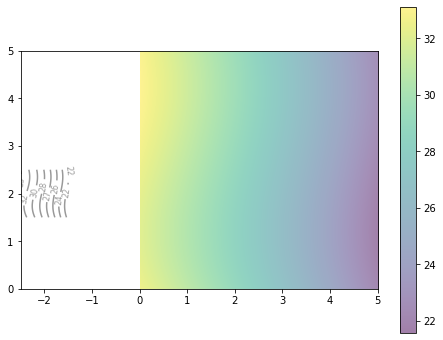

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
 
# Contour plot: With the global minimum showed as "X" on the plot
x, y = np.array(np.meshgrid(np.linspace(-2.5,-1.5,10000), np.linspace(1.5,2.5,10000)))
z = f(x, y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()